\


This is a very `minimalist` introductory Jupyter notebook intended to run on `Google Colab` to briefly show how `easyXRD` works.\
The final refinement is **NOT** optimal and needs to be improved.\
See the next notebook `02_intermediate.ipynb` once you successfully run all cells in this notebook.

\

In order to run this notebook on Google Colab (https://colab.research.google.com/), we need to pull:

* `easyXRD` [package](https://github.com/MehmetTopsakal/easyXRD) from GitHub,

* A `Intensity-vs-TwoTheta` plain text file that contains XRD data: [LaB6_synchrotron_XRD_from_28ID-2.xy](https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy) from GitHub,

* A `cif file` that contains structural data for LaB6 powder measured at 28ID-2 (XPD) beamline of NSLS-2 [LaB6_cif](https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_structure_from_MaterialsProject.cif) from GitHub,

* A `zip` file that contains GSAS-II python files from a Google Drive [link](https://drive.google.com/file/d/1IVwLaPvMjP3kZGgA4la4XBROY4pDjb9j/view?usp=sharing) and extract it.

By executing the next cell, we get all these necessary steps in Google Colab instance.


In [6]:
# This clones easyXRD repo from GitHub
!! git clone https://github.com/MehmetTopsakal/easyXRD.git
# This gets LaB6_synchrotron_XRD_from_28ID-2.xy file from GitHub
!! wget https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy
# This gets LaB6_structure_from_MaterialsProject.cif file from GitHub
!! wget https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_structure_from_MaterialsProject.cif
# This gets GSAS-II zip file file from Mehmet Topsakal's Google Drive share and extracts it
!! gdown 1IVwLaPvMjP3kZGgA4la4XBROY4pDjb9j -O gsas2_v5038.zip; unzip gsas2_v5038.zip -d /root
! echo done!

done!


In [2]:
# Adding easyXRD python package that we cloned from GitHub into sys
import sys

# sys.path += ["easyXRD"]
sys.path += ["/home/mt/OneDrive/repositories/easyXRD"]
from easyxrd.core import exrd

# importing matplotlib for plots
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True

# Enabling custom widget for "%matplotlib widget" line above to work in Colab
# from google.colab import output

# output.enable_custom_widget_manager()



Checking required packages:

---xarray package with version 2024.7.0 is available and can be imported 
---ipympl package with version 0.9.4 is available and can be imported 
---scipy package with version 1.14.0 is available and can be imported 
---pybaselines package with version 1.1.0 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---pymatgen package with version 2024.8.9 is available and can be imported 
---pyFAI package with version 2024.5.0 is available and can be imported 
---mp_api package with version 0.42.1 is available and can be imported 
---fabio package with version 2024.4.0 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 


Imported easyxrd with the following configuration:

easyxrd_scratch_path : /home/mt/.easyxrd_scratch
gsasii_lib_path : /home/mt/g2full/GSAS-II/GSASII
mp_api_key : dHgNQ......


In [8]:
sample = exrd()

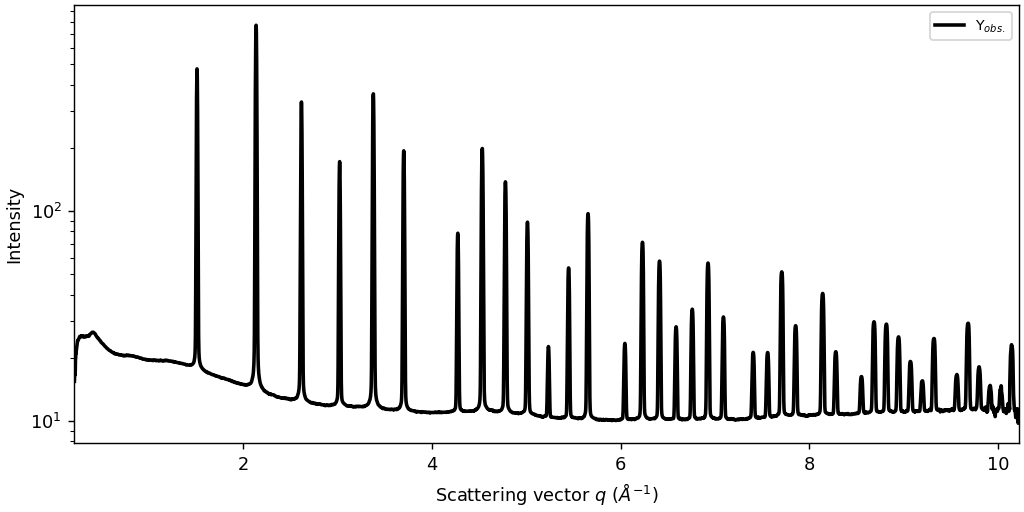

In [9]:
sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstom=0.1814,
    plot=True,
)

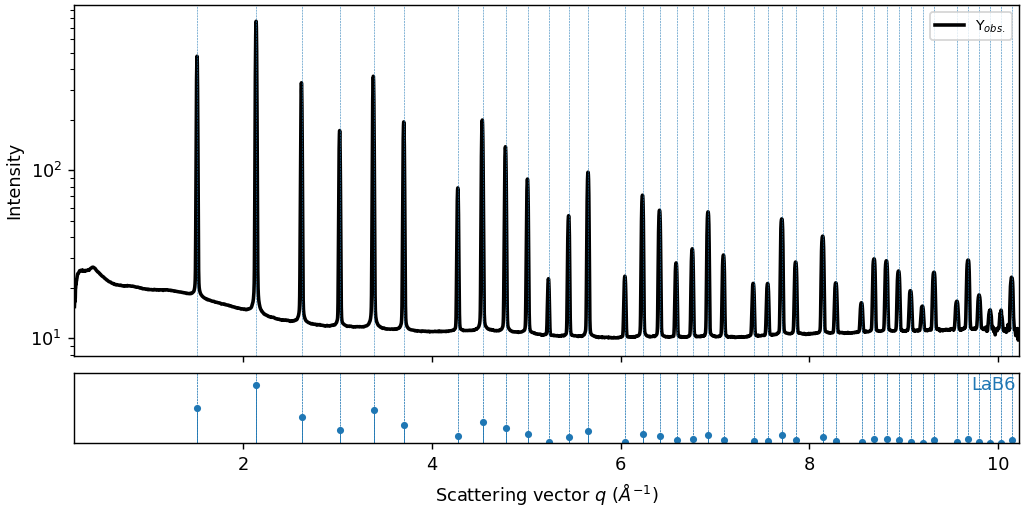

In [10]:
phases = [
    {
        "cif": "LaB6_structure_from_MaterialsProject.cif",
        "label": "LaB6",
    },
]
sample.load_phases(phases, plot=True)

ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build

 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 31.344/1.361 



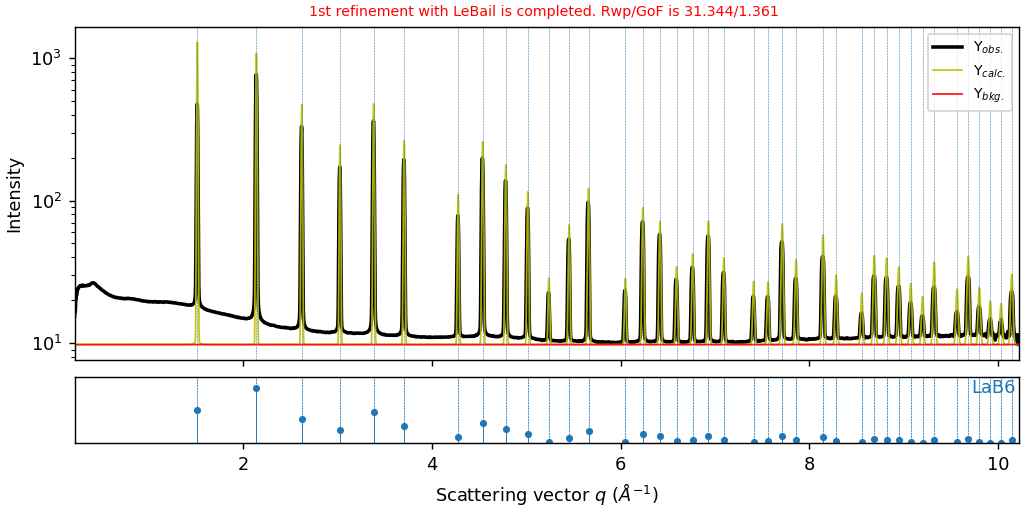

In [11]:
sample.setup_gsas2_refiner(
    plot=True,
)

 ✅--Background with 10 coeffs is refined. Rwp/GoF is now 19.229/0.835 (was 31.344(-38.65%)/1.361(-38.62%✨))


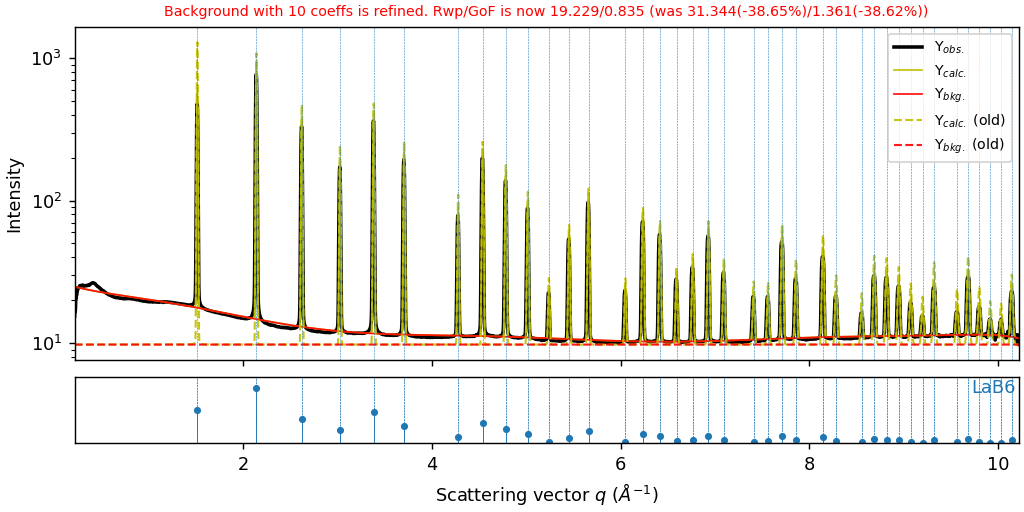

In [12]:
sample.refine_background(plot=True)

 ✅--Cell parameters are refined. Rwp/GoF is now 9.707/0.421 (was 19.229(-49.52%)/0.835(-49.54%✨))


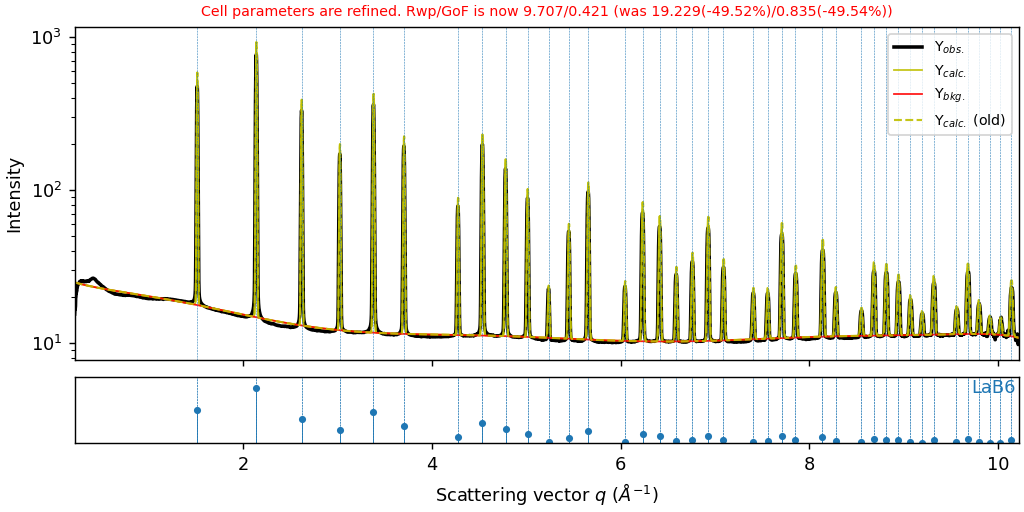

In [13]:
sample.refine_cell_parameters(plot=True)

 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 7.819/0.339 (was 9.707(-19.46%)/0.421(-19.46%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 7.413/0.322 (was 7.819(-5.19%)/0.339(-5.19%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 7.194/0.312 (was 7.413(-2.95%)/0.322(-2.95%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 6.979/0.303 (was 7.194(-2.98%)/0.312(-2.98%))


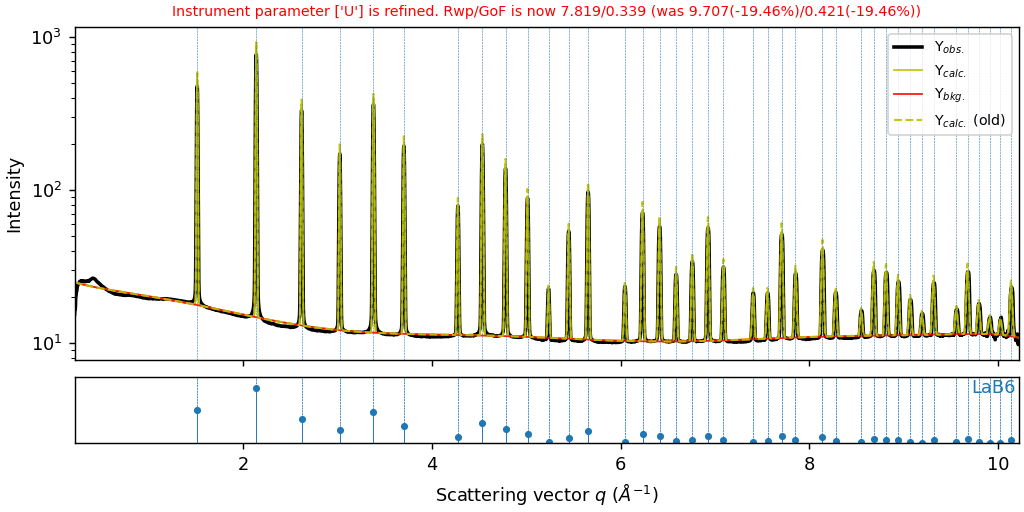

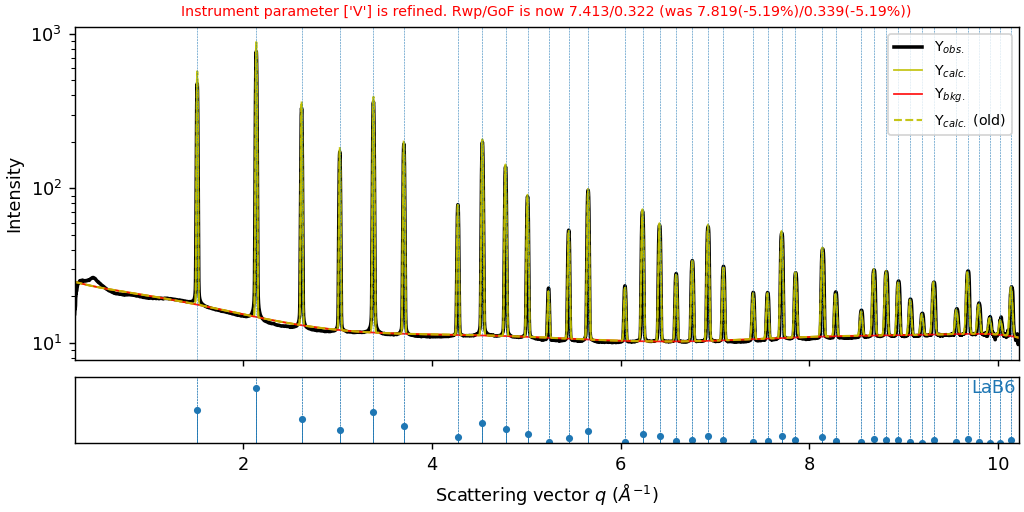

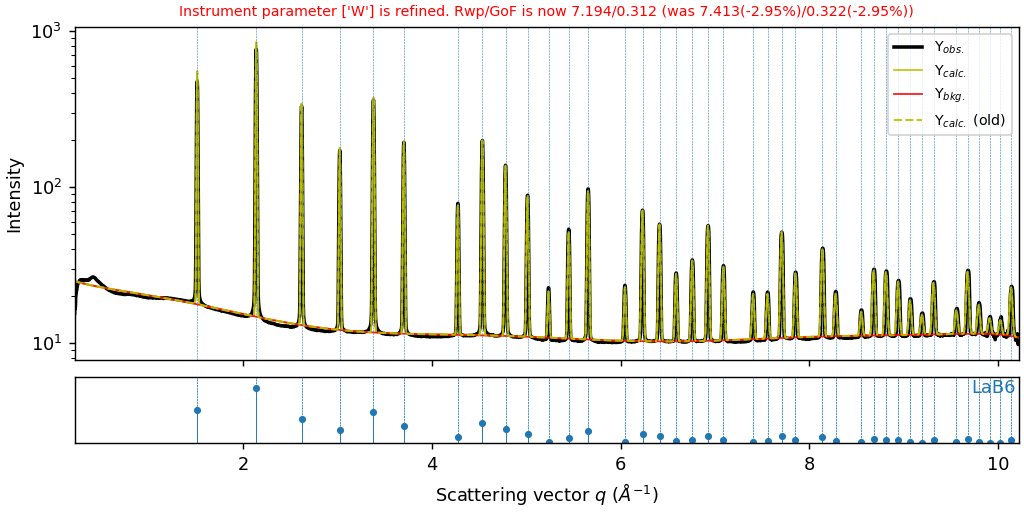

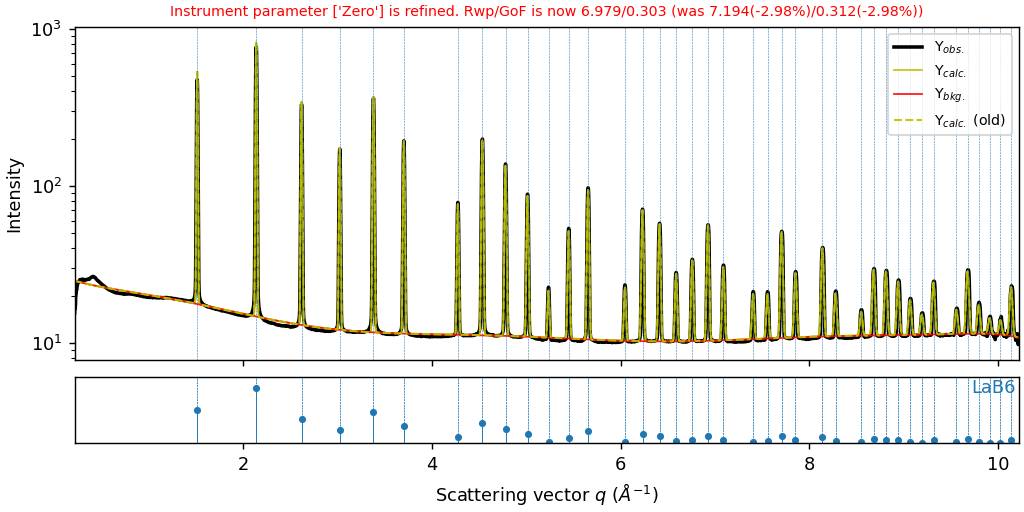

In [14]:
sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=True)

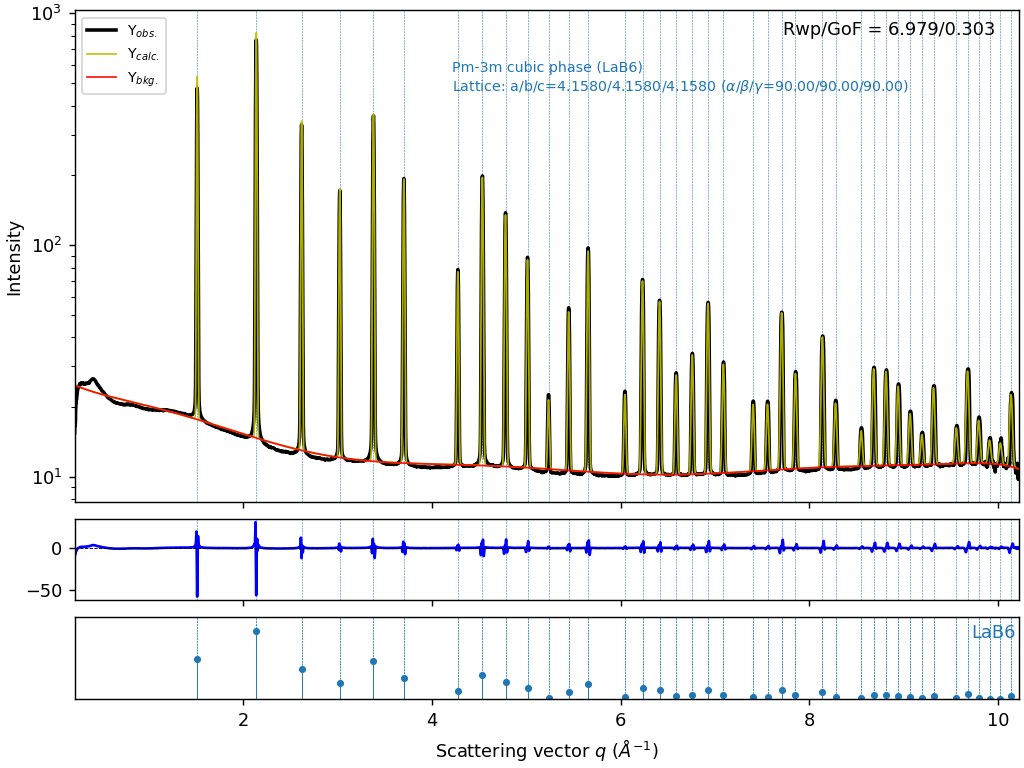

In [15]:
sample.plot()


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 27.137/1.183 

 ✅--Background with 10 coeffs is refined. Rwp/GoF is now 20.576/0.897 (was 27.137(-24.18%)/1.183(-24.13%✨))
 ✅--Cell parameters are refined. Rwp/GoF is now 9.863/0.430 (was 20.576(-52.07%)/0.897(-52.09%✨))
 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 7.611/0.332 (was 9.863(-22.83%)/0.430(-22.83%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 7.158/0.312 (was 7.611(-5.95%)/0.332(-5.95%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 6.908/0.301 (was 7.158(-3.48%)/0.312(-3.48%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 6.700/0.292 (was 6.908(-3.02%)/0.301(-3.02%))
 ✅--Cell parameters are refined. Rwp/GoF is now 6.651/0.290 (was 6.700(-0.73%)/0.292(-0.73%❗))
 ✅--Background with 15 coeffs is refined. Rwp/GoF is now 6.383/0.278 (was 6.651(-4.02%)/0.290(-3.94%))


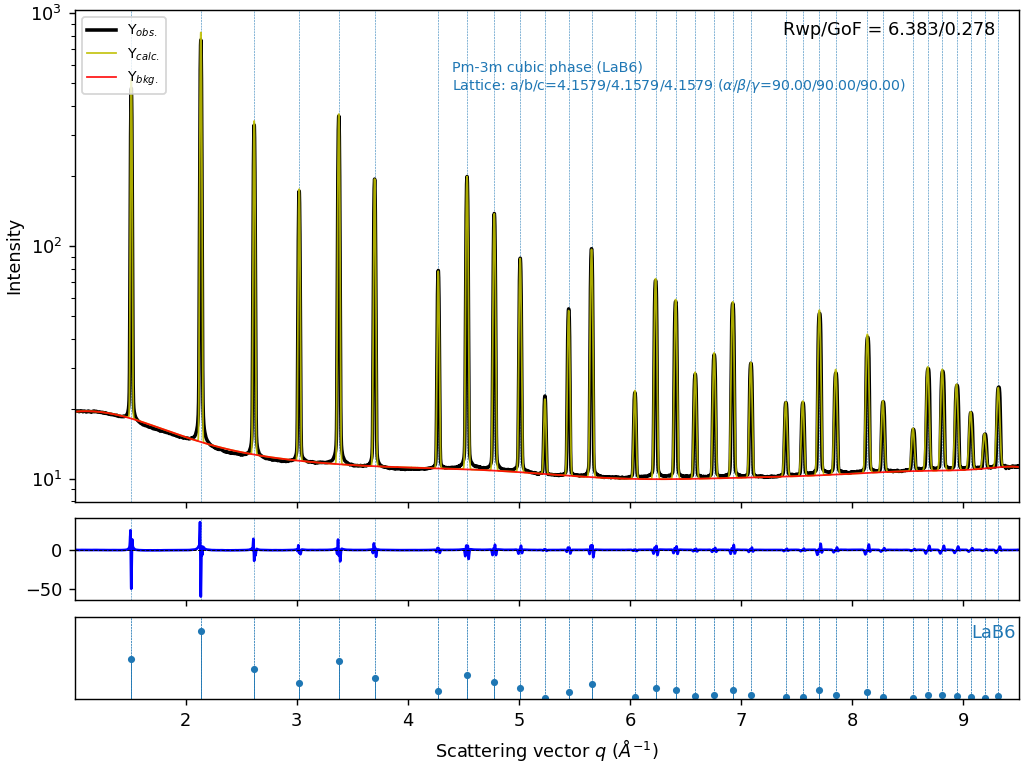

In [16]:
sample = exrd()


sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstom=0.1814,
    plot=False,
    # here we select scattering vector start from 1 as there are no peaks before and stop at 9.5 as the data gets noisy after that.
    radial_range=[1, 9.5],
)

sample.load_phases(
    [{"cif": "LaB6_structure_from_MaterialsProject.cif", "label": "LaB6"}], plot=False
)
sample.setup_gsas2_refiner(plot=False)

sample.refine_background(plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=False)

# We can re-refine background since we improved instrument parameters in previous steps
sample.refine_cell_parameters(plot=False)

# We can re-refine background with higher number of coefficients
sample.refine_background(num_coeffs=15, plot=False)

sample.plot()

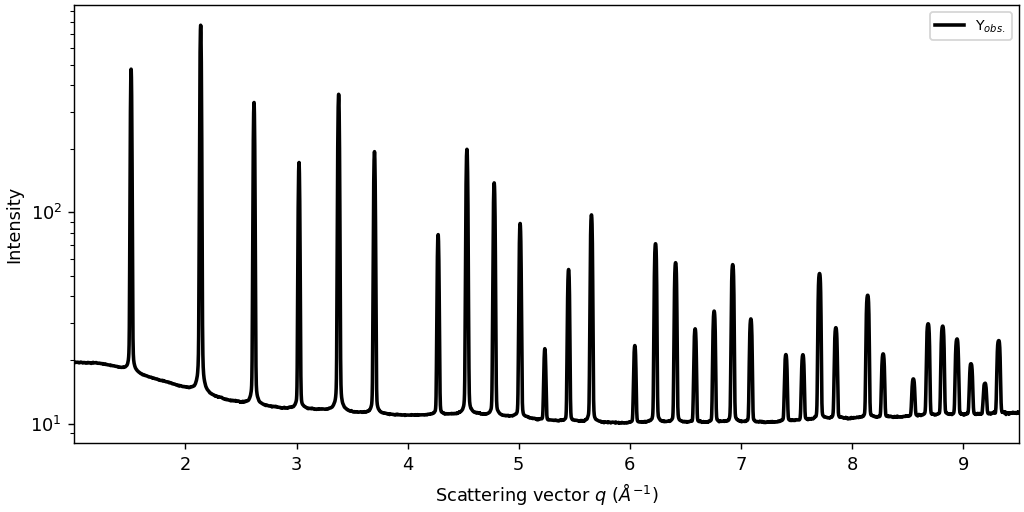

In [17]:
sample = exrd()

sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstom=0.1814,
    plot=True,
    radial_range=[1, 9.5],
)

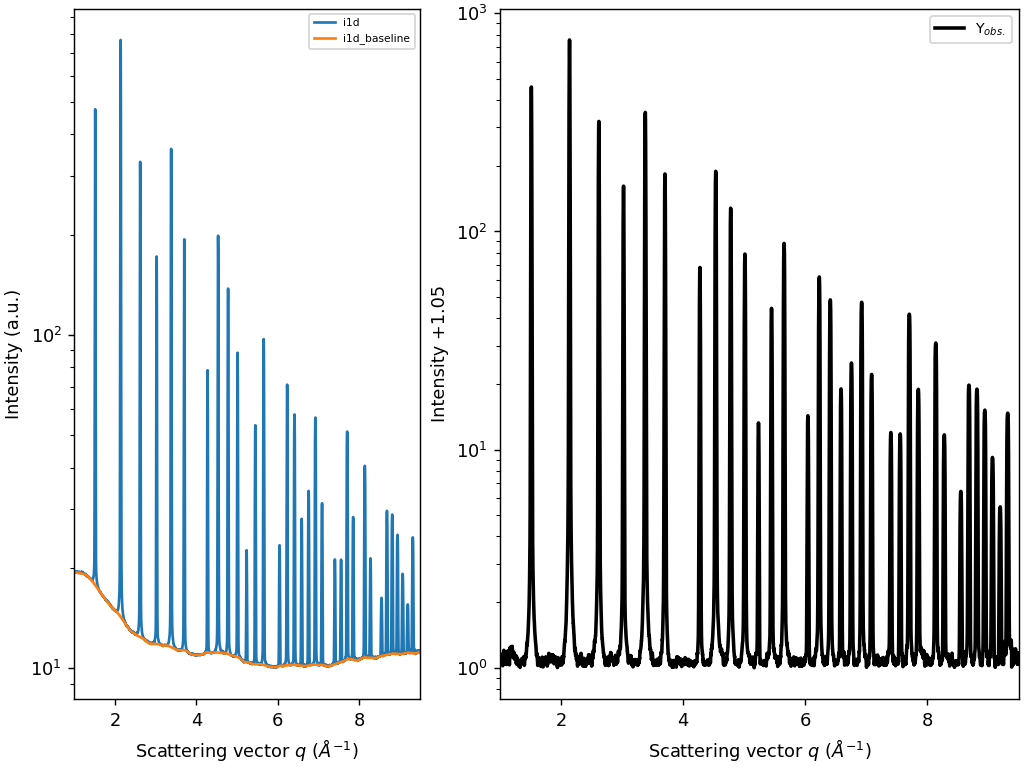

In [18]:
sample = exrd()


sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstom=0.1814,
    plot=False,
    radial_range=[1, 9.5],
)

sample.get_baseline()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

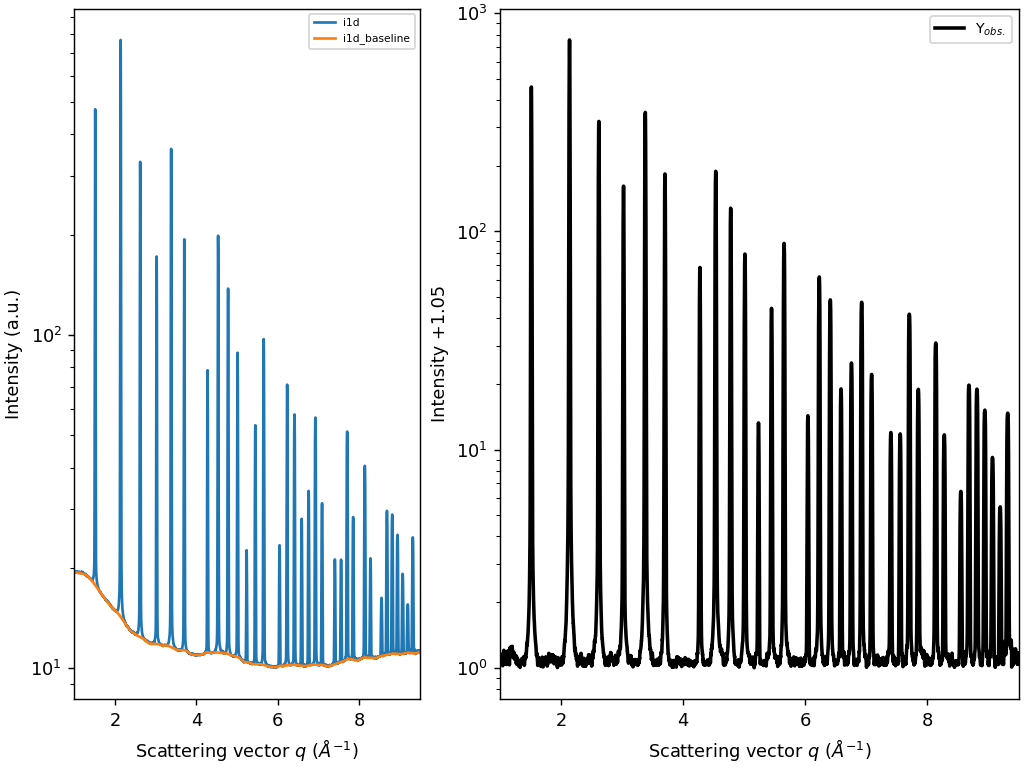

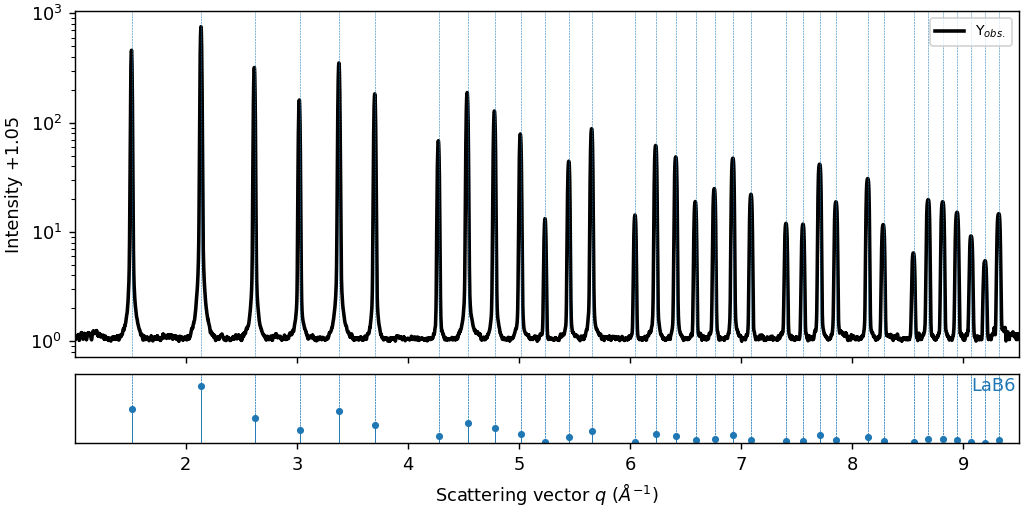

In [19]:
sample = exrd()


sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstom=0.1814,
    plot=False,
    radial_range=[1, 9.5],
)


sample.get_baseline()

sample.load_phases([{"mp_id": "mp-2680", "label": "LaB6"}], plot=True)


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 24.665/0.345 

 ✅--Cell parameters are refined. Rwp/GoF is now 11.877/0.166 (was 24.665(-51.85%)/0.345(-51.84%✨))
 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 9.197/0.128 (was 11.877(-22.56%)/0.166(-22.56%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 8.674/0.121 (was 9.197(-5.69%)/0.128(-5.69%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 8.337/0.116 (was 8.674(-3.88%)/0.121(-3.88%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 7.932/0.111 (was 8.337(-4.87%)/0.116(-4.87%))
 ✅--Cell parameters are refined. Rwp/GoF is now 7.880/0.110 (was 7.932(-0.65%)/0.111(-0.65%❗))


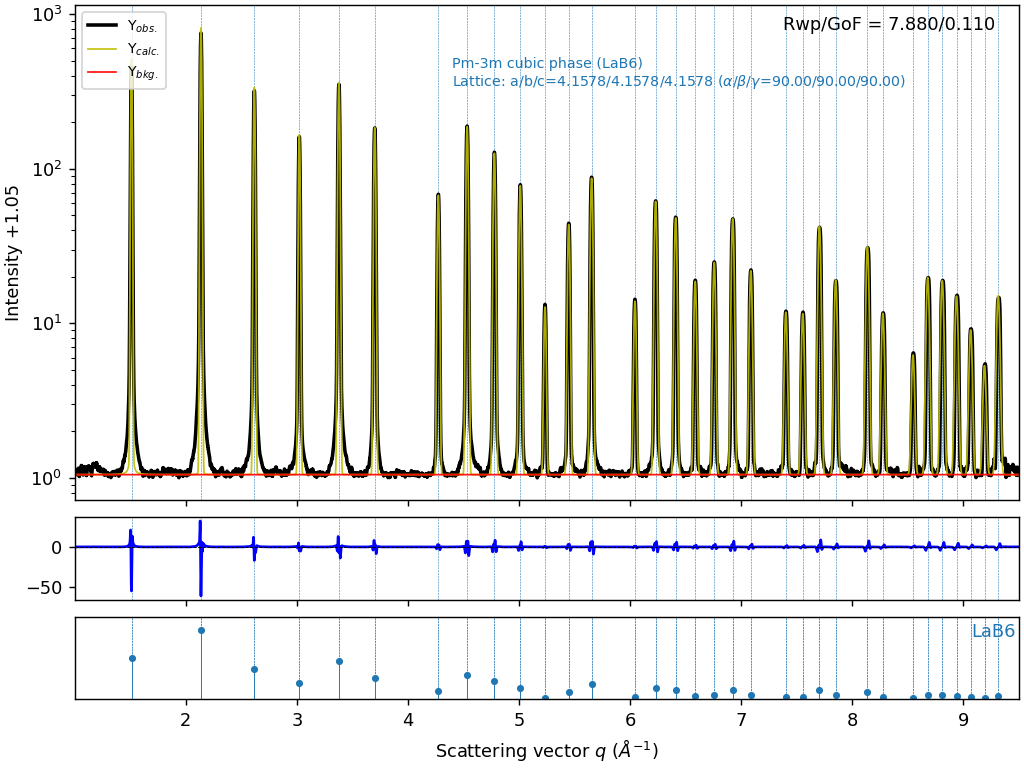

In [20]:
sample.setup_gsas2_refiner(plot=False, normalize=True)


sample.refine_cell_parameters(plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=False)

sample.refine_cell_parameters(plot=False)


sample.plot()